# 문제 1
- 자동차 데이터 셋에서 qsec 컬럼을 Min-Max Scale로 변환 후 0.5보다 큰 값을 가지는 레코드(row) 수를 구하라
- data 출처: https://www.kaggle.com/ruiromanini/mtcars
- data 추가방법 : 우측 메뉴 -> +Add data -> mtcar(ruiromanini) ADD
- 영상 링크 : https://youtu.be/E86QFVXPm5Q

## 풀이1

In [2]:
# 데이터 및 라이브러리 불러오기
import pandas as pd
from sklearn.preprocessing import minmax_scale

data = pd.read_csv('./data/mtcars.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['qsec'] = scaler.fit_transform(data['qsec'].values.reshape(-1,1)) # minmaxscaler 적용 / 변환
len(data[data['qsec'] > 0.5]) # qsec컬럼이 0.5보다 큰값을 가지는 레코드 수 확인

9

# 문제 2 : 이상치를 찾아라
- 데이터에서 IQR을 활용해 Fare컬럼의 이상치를 찾고, 이상치 데이터의 여성 수를 구하시오
- 강의 영상 : https://youtu.be/ipBW5D_UJEo
- 데이터셋 : titanic 
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 데이터 위치 "../input/titanic/train.csv" (copy&edit가 아닐 경우 별도로 데이터셋 불러와야 함)

## 풀이

In [4]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np
df = pd.read_csv('./data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
i3 = df['Fare'].quantile(0.75)
i1 = df['Fare'].quantile(0.25)

iqr = i3-i1
max_norm = i3 + 1.5 * iqr
min_norm = i1 - 1.5 * iqr

df[(df['Fare']> max_norm)|(df['Fare']< min_norm)] # 이상치 구하기
df[((df['Fare']> max_norm)|(df['Fare']< min_norm)) & (df['Sex'] == 'female')] # 이상치 중 여성 구하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


# 문제3 : 이상치를 찾아라(소수점 나이)
- 주어진 데이터에서 이상치(소수점 나이)를 찾고 올림, 내림, 버림(절사)했을때 3가지 모두 이상치 'age' 평균을 구한 다음 모두 더하여 출력하시오
- 데이터셋 : basic1.csv
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/c3Fr9G-ZYdw

## Hint
- import numpy as np
- 올림: np.ceil()
- 내림: np.floor()
- 버림: np.trunc()

## 쉬어가기 : 내림과 버림의 차이는??
- 양수에서는 같지만 음수에서는 -5.5에서 내림을 하면 -6, 버림을하면 -5가 된다.

## 풀이

In [6]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('./data/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [7]:
# 이상치 (소수점나이) 찾기
target_idx = df[df.age % 1 != 0].index # 1로 나눈 나머지가 0이 아닌 값의 인덱스 저장
target_idx

Int64Index([6, 8, 21, 28, 46, 64, 84, 92], dtype='int64')

In [8]:

올림_평균 = np.ceil(df.loc[target_idx,'age']).mean()
내림_평균 = np.floor(df.loc[target_idx,'age']).mean()
버림_평균 = np.trunc(df.loc[target_idx,'age']).mean()
print(f'올림평균 : {올림_평균}, 내림평균 : {내림_평균}, 버림평균 : {버림_평균}')
print(f'더한 값 : {올림_평균+내림_평균+버림_평균}') # 더하여 출력

올림평균 : 23.75, 내림평균 : 22.75, 버림평균 : 23.0
더한 값 : 69.5


# 문제4 : 결측치 처리
-  주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!
- 데이터셋 : basic1.csv 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/WqlpqBRn7x4

## 풀이

In [26]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('./data/basic1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [30]:
df.isnull().sum() / df.shape[0] # null 값의 비중 확인하기

id      0.00
age     0.00
city    0.00
f1      0.31
f2      0.00
f3      0.95
f4      0.00
f5      0.00
dtype: float64

In [12]:
# 주어진 데이터에서 결측치가 80%이상 되는 컬럼은(변수는) 삭제하고, 80% 미만인 결측치가 있는 컬럼은 'city'별 중앙값으로 값을 대체하고 'f1'컬럼의 평균값을 출력하세요!
df = pd.read_csv('./data/basic1.csv')
df = df.drop('f3', axis=1 ) # 결측치 80% 이상인 컬럼 삭제
df_gcm_f1 = df.groupby('city').median()['f1']
df_na_idx = df['f1'].isna()
df.loc[df_na_idx,'f1'] = df.loc[df_na_idx,'city'].apply(lambda x : df_gcm_f1[x]).values # 결측치 80% 미만인 컬럼 'city'별 중앙값으로 대체
df['f1'].mean() # f1컬럼의 평균값

65.52

# 문제5 : 왜도와 첨도 구하기
-  주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
- 데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
- 오른쪽 상단 copy&edit 클릭 -> 예상문제 풀이 시작
- 강의 영상 : https://youtu.be/_ft7ZlDlk7c

## 왜도
비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 **실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표**이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

**위키백과 https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84

## 첨도
**확률분포의 꼬리가 두꺼운 정도**를 나타내는 척도이다. 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타낸다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 3보다 작을 경우에는(K<3) 산포는 정규분포보다 꼬리가 얇은 분포로 생각할 수 있다, 첨도값이 3보다 큰 양수이면(K>3) 정규분포보다 꼬리가 두꺼운 분포로 판단할 수 있다.

## Hint
- DataFrame.skew() 왜도
- DataFrame.kurt() 첨도

## 풀이

In [13]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 데이터 불러오기
# df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df = pd.read_csv("./data/house.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

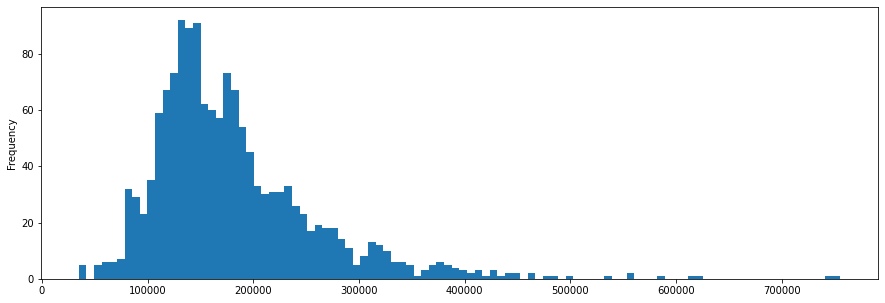

In [17]:
# 주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
df['SalePrice'].plot(kind = 'hist', figsize= (15,5), bins= 100);

In [19]:
s = df['SalePrice'].skew() # 왜도
k = df['SalePrice'].kurt() # 첨도
print(s,k) #왜도, 첨도

1.8828757597682129 6.536281860064529


0.93


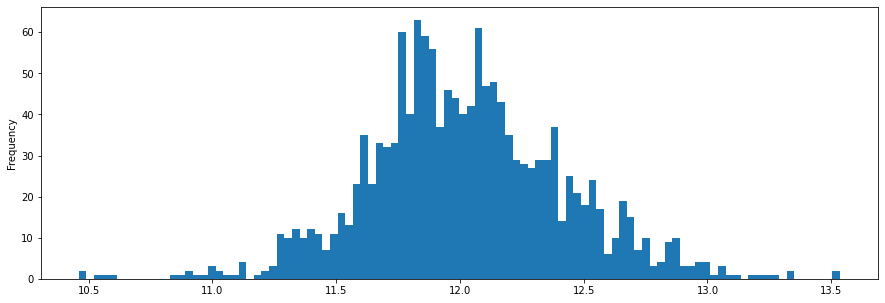

In [24]:
import numpy as np
df['SalePrice_scaled'] = np.log1p(df['SalePrice'].values) # log1p 스케일링 컬럼 생성
s_scaled = df['SalePrice_scaled'].skew() # 스케일링왜도
k_scaled = df['SalePrice_scaled'].kurt() # 스케일링첨도
print(f"{s_scaled + k_scaled:.2f}") # 스케일링 후 왜도와 첨도 합계
df['SalePrice_scaled'].plot(kind = 'hist', figsize= (15,5), bins= 100); # 스케일링 후 분포